<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [4]:
# <импорт библиотеки pandas>
import pandas as pd

# <импорт библиотеки math>
import math

# <импорт библиотеки sklearn>
import sklearn

# <Отключение предупреждений>
import warnings
warnings.filterwarnings('ignore')

# <импорт библиотеки numpy>
import numpy as np

# <импорт библиотеки seaborn для построения графиков>
import seaborn as sns

# <Импортируем функцию из бибилиотеки sklearn>
from sklearn.model_selection import train_test_split

# <импортируем StandardScaler из библиотеки sklearn>
from sklearn.preprocessing import StandardScaler

# <импортируем алгоритм исчерпывающего поиска по гиперпараметрам>
from sklearn.model_selection import GridSearchCV

# <Импортируем метод дерева принятия решений>
from sklearn.tree import DecisionTreeClassifier

# <Импортируем алгоритм случайного леса>
from sklearn.ensemble import RandomForestClassifier

# <Импортируем алгоритм случайного поиска по гиперпараметрам>
from sklearn.model_selection import RandomizedSearchCV

# <Импортируем метод логистической регрессии>
from sklearn.linear_model import LogisticRegression

# <Импортируем функцию cross_val_score>
from sklearn.model_selection import cross_val_score

# <импортируем оценку F1-меры>
from sklearn.metrics import f1_score

# <импортируем функцию resample>
from sklearn.utils import resample

# <импортируем функцию roc_auc_score>
from sklearn.metrics import roc_auc_score

In [5]:
# <чтение файла с данными с сохранением в переменную df>
df = pd.read_csv('/Users/artemvishanov/Desktop/yandex_practicum_project/7. Отток клиентов/Churn.csv')

Рассмотрим информацию о датафрейме и первые пять строк

In [6]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Имеются пропуски в Tenure. Устраним их.

In [7]:
# <Заменим значения количества недвижимости равные NaN на 0> 
df = df.fillna(df['Tenure'].mean())

In [8]:
# <поменяем тип на целочисленный>
df['Tenure'] = df['Tenure'].astype('int64')

Создадим новый датафрейм, удалим из него столбцы Surname и RowNumber, которые не влияют на столбец Exited.

* Клиенты в датафрейме расположены не по порядку возрастания CustomerId, который может в теории указывать нам на то, насколько давно клиент сотрудничает с банком, соответственно номер строки никак не влияет на наш целевой признак.
* Различных фамилий в датафрейме более двух тысяч, соответственно использовав их мы только усложним модель.
* также столбцы EstimatedSalary и CustomerId

In [9]:
# <сбросим два столбца, которые не помогу нам предсказать целевой признак>
df_ohe = df.drop(['Surname', 'RowNumber', 'CustomerId'], axis = 1)
df_ohe

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Преобразуем категориальные признаки в количественные с помощью техники прямого кодирования (OHE), в этом поможет метод .get_dummies. Также проставим аргумент drop_first = True, чтобы один из столбцов наших фиктивных переменных для каждого признака был сброшен(это нужно чтобы не угодить в так называемую дамми-ловушку, когда фиктивных признаков слишком много).

In [10]:
# <Преобразуем категориальные признаки в фиктивные переменные, и сбросим по одному из них у каждого признака.>
df_ohe = pd.get_dummies(df_ohe, drop_first=True)

Взглянем на датафрейм:

In [11]:
# <Посмотрим первые 5 строк преобразованного датафрейма>
print(df_ohe.info())
df_ohe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB
None


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Разобьем данные на две выборки: обучающую + валидационную и тестовую. Разобьем их в отношении 4:1, попробуем использовать в этом проекте кросс-валидацию, проставив относящийся к ней аргумент в методе GridSearchCV:

In [12]:
# <Разделим обучающий датафрейм на features и target - целевой признак>
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

# <Поделим датафрейм на обучающую выборку + валидационную выборку (которая далее будет использована для кросс-валидации) и тестовую выборку.>
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

Проведем масштабирование признаков:

In [13]:
# <конкретизируем какие признаки будем масшатбировать>
numeric = ['CustomerId', 'CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

**Вывод:**
* Мы осмотрели данные и заполнили пропуски самым очевидным образом.
* Мы сменили тип данных, так как количество недвижимости дробится не может, и целочисленный тип здесь подходит лучше
* Мы удалили из датафрейма столбцы, которые никак не помогут вычислить целевой признак.
* Преобразовали категориальные признаки в количественные с помощью техники прямого кодирования (OHE), создали для этих признаков количественные фиктивные переменные.
* Провели масштабирование признаков, чтобы алгоритм обучения не делал выводов о том что тот или иной признак важнее только из-за того что он измеряется в больших числах.
* Разделили данные на обучающую + валидационную и тестовую выборки. Первую будем использовать для обучения и валидации когда будем перебирать гиперпараметры с помощью GridSearchCV - метода для исчерпывающего поиска по сетке гиперпараметров.

## Исследование задачи

Исследуем баланс классов:

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:title={'center':'Соотношение тех, кто остался и тех кто ушел'}>

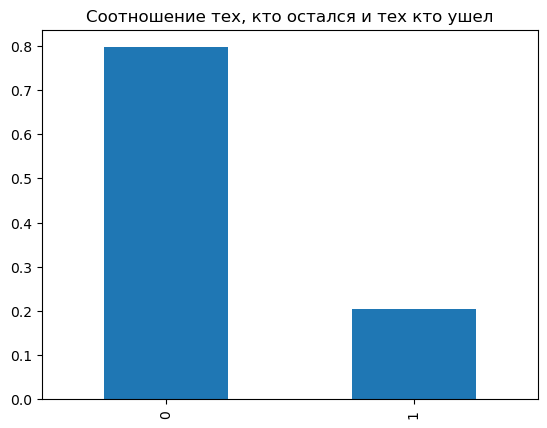

In [14]:
class_frequency = target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', title='Соотношение тех, кто остался и тех кто ушел')

80% клиентов в датафрейме из банка не уходят - в классах дисбаланс. Идеальным балансом чтобы строить модели можно было бы назвать распределение 50/50. Попробуем обучить модель, несмотря на дисбаланс.

Попробуем использовать GridSearchCV для подбора параметров модели дерева принятия решений. Я слышал что использование таких методов не рекомендуется в проекте без понимания того что в них происходит, поэтому постараюсь разъяснить код:

* param_grid это словарь в котором указываются гиперпараметры и интервалы в которых они могут находится, или в случае если это категориальные признаки - возможные значения.
* в np.arange в качестве третьего аргумента шаг. Первый и второй аргумент - начало и конец последовательности. np.arange(0.5, 1, 0.1) - тут в последовательности не будет единицы но будет [0.5, 0.6, 0.7, 0.8, 0.9].
* max_leaf_nodes - максимальное количество листовых узлов (нижние узлы с ответами).
* max_features - количеcтво используемых признаков.
* min_samples_split - минимальное число объектов, при котором выполняется расщепление на узлы.
* аргумент cv необходим для кросс-валидации, я изучил следующий спринт после этого, и поэтому имею представление о ней. Я выбрал 4 блока, так как ранее нам рекомедовали делить выборку на обучающую, валидационную и тестовую в соотношении 3:1:1. Соответственно 4 фолда это три фолда для обучения и один для валидации.
* аргумент scoring указывает как будем оценивать модели, для моделей классификации необходимо использовать F1-меру.

In [15]:
%%time
# <сетка гиперпараметров, по которой будет происходит исчерпывающий поиск>
param_grid = {
    'max_depth': [None] + list(np.arange(2, 21,2).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes': [None] + list(np.arange(10, 101, 10).astype(int)),
    'min_samples_split': [2, 5, 10]
}

# <дерево принятия решений к которому будем подбирать параметры>
estimator = DecisionTreeClassifier(random_state = 12345)

# <модель>
model = GridSearchCV(estimator, param_grid, cv=4, scoring = 'f1')

# <обучаем модель> 
model.fit(features_train, target_train)

CPU times: user 33.7 s, sys: 234 ms, total: 33.9 s
Wall time: 34 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18,
                                       20],
                         'max_features': ['auto', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90, 100],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [16]:
# <среднее значение F1-меры по разным выборкам>
model.best_score_

0.576293867402631

Оценка неплоха, близка к оценке, к которой мы стремимся.

Чтобы посчитать для этой модели AUC-ROC, пришлось поднапрячься. В данном блоке мы импортируем саму оценку, скидываем индексы выборкам, так как если этого не сделать, в некоторых строках будет NaN. Далее мы выбираем количество наших блоков кросс-валидации = 4. И затем подсчитываем AUC_ROC для каждого варианта обучающей и валидационной выборки. Затем подсчитываем их среднее и получаем финальную оценку:

In [17]:
features_train = features_train.reset_index(drop = True)
target_train = target_train.reset_index(drop = True)

auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.8850223488559845

Эта оценка выше 0.5, а значит проходит проверку на адекватность. Но нам относительно далеко до идеальной оценки = 1.

In [18]:
# <набор параметров, которые подобрал исчерпывающий поиск по гиперпараметрам модели.>
model.best_params_

{'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 100,
 'min_samples_split': 2}

Попробуем RandomizedSearchCV - случайный поиск по гиперпараметрам с моделью случайного леса.

* bootstrap - Бутстрэп-агрегирование или бэггинг, алгоритм предназначенный для улучшения стабильности и точности алгоритмов машинного обучения, также уменьшает дисперсию и помогает избежать переобучения.

In [19]:
%%time
# <сетка гиперпараметров, по которой будет происходит случайный поиск>
param_grid = {
    'n_estimators': list(np.arange(2, 101, 2).astype(int)),
    'max_depth': [None] + list(np.arange(2, 21,2).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes': [None] + list(np.arange(10, 101, 10).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# <случайный лес к которому будем подбирать параметры>
estimator = RandomForestClassifier(random_state = 12345)

# <модель>
model_rf = RandomizedSearchCV(estimator, param_grid, cv=4, scoring = 'f1')

# <обучаем модель> 
model_rf.fit(features_train, target_train)

CPU times: user 9.66 s, sys: 77.4 ms, total: 9.74 s
Wall time: 9.76 s


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=12345),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 12,
                                                      14, 16, 18, 20],
                                        'max_features': ['auto', 'sqrt', None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90,
                                                           100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [2, 4, 6, 8, 10, 12, 14,
                                                         16, 18, 20, 22, 24, 26,
                                                         28, 30, 32, 34, 36, 38,
                                                         40, 42, 44, 46, 48, 50,


In [20]:
# <среднее значение F1-меры по разным выборкам>
model_rf.best_score_

0.5672396489146506

Оценка хуже чем у одного дерева принятия решений. Подсчитаем AUC-ROC:

In [21]:
auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    probabilities_valid = model_rf.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)    
    
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.8796108313276474

Оценка разнится в зависимости от отработки случайного поиска, но примерно равна таковой у дерева принятия решений.

In [22]:
# <набор параметров, которые подобрал исчерпывающий поиск по гиперпараметрам модели.>
model_rf.best_params_

{'n_estimators': 38,
 'min_samples_split': 10,
 'max_leaf_nodes': 80,
 'max_features': None,
 'max_depth': 18,
 'bootstrap': False}

Попробуем логистическую регрессию:

In [23]:
# <Создадим модель лог. регрессии,>
model_lr = LogisticRegression(random_state=12345)

# <Оценим качество модели, обученной в ходе перекрестной проверки>
score = cross_val_score(model_lr,features_train, target_train,cv=4,scoring='f1').mean()

# <обучаем модель> 
model_lr.fit(features_train, target_train)

# <выведем долю правильных ответов>
score

0.08946019486953492

Слабая оценка. В следующем пункте попробуем избавиться от дисбаланса, и снова обучить модель. Подсчитаем AUC-ROC:

In [24]:
auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    
    probabilities_valid = model_lr.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.6682627859402173

Самая низкая оценка.

**Вывод:**
* Мы оценили сбалансированность целевого признака, и выяснили что в нем присутствует дисбаланс.
* Подобрали лучшие гиперпараметры для дерева принятия решений с помощью метода GridSearchCV.
* Подобрали гиперпараметры для случайного леса с помощью метода RandomizedSearchCV. Получили результат примерно равный результату у дерева принятия решений.
* Попробовали обучить логистическую регрессию, но получили оценку гораздо хуже чем у "деревянных" алгоритмов.

В следующем пункте избавимся от дисбаланса и снова обучим модель.



## Борьба с дисбалансом

Начнем, относительно, с начала. Это необходимо, так как кросс-валидацию и перебор параметров теперь нам придется проводить самостоятельно. Пришлось делать именно так из-за того я не имею представления как делать upsampling в методах аля GridSearchCV, единственное что там обнаружено для баланса классов - class_weight = 'balanced'.

В данном цикле происходит перебор моделей дерева принятия решений с различными гиперпараметрами, затем идет оценка модели на валидационной выборке, используется кросс-валидация, написанная на питоне. Она была изучена в следующем спринте. Также происходит апсемплинг положительного класса.

Здесь и далее будет происходит перебор не всех возможных значений гиперпараметров, я специально напишу код так, чтобы в переменной model была сохранена лучшая модель и можно было бы быстрее посчитать AUC-ROC.

In [25]:
%%time
for depth in range(2,7,2):
    for samples in [2, 5, 10]:
        model = DecisionTreeClassifier(random_state=0, max_depth=depth, 
                                               min_samples_split = samples
                                               )
                
        sample_size = int(len(features_train)/4)
        scores = []
        
        for i in range(0, len(features_train), sample_size):
            valid_indexes = list(range(i, i + sample_size))
            train_indexes = list(range(0,len(features_train)))
                    
            del train_indexes[i:(i + sample_size)]
                    
            features_train_1 = features_train.loc[train_indexes,]
            features_valid = features_train.loc[valid_indexes,]
            target_train_1 = target_train.loc[train_indexes,]
            target_valid = target_train.loc[valid_indexes,]
                    
            features_train_1['Exited'] = target_train_1
                
            features_train_majority = features_train_1[features_train_1.Exited==0]
            features_train_minority = features_train_1[features_train_1.Exited==1]
                    
            features_train_minority_upsampled = resample(features_train_minority, 
                                 replace=True,     
                                 n_samples=int(features_train_majority['Age'].count()),    
                                 random_state=123)
            
            features_train_upsampled = pd.concat([features_train_majority, features_train_minority_upsampled])
                    
                    
            target_train_upsampled = features_train_upsampled['Exited']
            features_train_upsampled = features_train_upsampled.drop('Exited', axis=1)
                    
            model.fit(features_train_upsampled, target_train_upsampled)
            predictions = model.predict(features_valid)
            score = f1_score(target_valid, predictions)
            scores.append(score)
                    
            if i == (sample_size * 3):
                scores = pd.Series(scores)
                print('max_depth =',depth,'min_samples_split =',samples,': {:.4f}'.format(scores.mean()))

max_depth = 2 min_samples_split = 2 : 0.5133
max_depth = 2 min_samples_split = 5 : 0.5133
max_depth = 2 min_samples_split = 10 : 0.5133
max_depth = 4 min_samples_split = 2 : 0.5254
max_depth = 4 min_samples_split = 5 : 0.5254
max_depth = 4 min_samples_split = 10 : 0.5254
max_depth = 6 min_samples_split = 2 : 0.5607
max_depth = 6 min_samples_split = 5 : 0.5607
max_depth = 6 min_samples_split = 10 : 0.5606
CPU times: user 1.62 s, sys: 174 ms, total: 1.8 s
Wall time: 677 ms


Лучшая оценка у дерева с параметрами max_depth = 6, min_samples_split = 10. Она равна 0.5606. Она ниже чем у дерева, подобранного GridSearchCV. Но и гиперпараметров мы перебирали меньше. Подсчитаем AUC-ROC:

In [26]:
auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)    
    
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.850895259357214

Далее опробуем тоже самое обучение на логистической регресии:

In [27]:
%%time
model = LogisticRegression()
                
sample_size = int(len(features_train)/4)
scores = []
        
for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
                    
    del train_indexes[i:(i + sample_size)]
                    
    features_train_1 = features_train.loc[train_indexes,]
    features_valid = features_train.loc[valid_indexes,]
    target_train_1 = target_train.loc[train_indexes,]
    target_valid = target_train.loc[valid_indexes,]
                    
    features_train_1['Exited'] = target_train_1
                
    features_train_majority = features_train_1[features_train_1.Exited==0]
    features_train_minority = features_train_1[features_train_1.Exited==1]
                    
    features_train_minority_upsampled = resample(features_train_minority, 
                                 replace=True,     
                                 n_samples=int(features_train_majority['Age'].count()),    
                                 random_state=123)
            
    features_train_upsampled = pd.concat([features_train_majority, features_train_minority_upsampled])
                    
                    
    target_train_upsampled = features_train_upsampled['Exited']
    features_train_upsampled = features_train_upsampled.drop('Exited', axis=1)
                    
    model.fit(features_train_upsampled, target_train_upsampled)
    predictions = model.predict(features_valid)
    score = f1_score(target_valid, predictions)
    scores.append(score)
                    
    if i == (sample_size * 3):
        scores = pd.Series(scores)
        print('f1_score =','{:.4f}'.format(scores.mean()))

f1_score = 0.4130
CPU times: user 797 ms, sys: 143 ms, total: 940 ms
Wall time: 136 ms


In [28]:
auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)    
    
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.7055421228850921

Результат улучшился и довольно сильно, баланс классов имеет большое значение для логистической регрессии.

Попробуем наш алгоритм перебора и обучения с апсемплингом на случайном лесе. Здесь установим гиперпараметры дерева те что подобрали у дерева принятия решений и будем перебирать только количество деревьев.

In [29]:
for est in range(10, 51, 10):
    for depth in range(1, 6):
        auc_roc_scores = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)

In [30]:
auc_roc_scores

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=12345)

In [31]:
%%time
for estimators in range(2,20,2):
    model = RandomForestClassifier(random_state=0, max_depth=6, 
                                               min_samples_split = 10,
                                               n_estimators = estimators)
                
    sample_size = int(len(features_train)/4)
    scores = []
        
    for i in range(0, len(features_train), sample_size):
        valid_indexes = list(range(i, i + sample_size))
        train_indexes = list(range(0,len(features_train)))
                    
        del train_indexes[i:(i + sample_size)]
                    
        features_train_1 = features_train.loc[train_indexes,]
        features_valid = features_train.loc[valid_indexes,]
        target_train_1 = target_train.loc[train_indexes,]
        target_valid = target_train.loc[valid_indexes,]
                    
        features_train_1['Exited'] = target_train_1
                
        features_train_majority = features_train_1[features_train_1.Exited==0]
        features_train_minority = features_train_1[features_train_1.Exited==1]
                    
        features_train_minority_upsampled = resample(features_train_minority, 
                                 replace=True,     
                                 n_samples=int(features_train_majority['Age'].count()),    
                                 random_state=123)
            
        features_train_upsampled = pd.concat([features_train_majority, features_train_minority_upsampled])
                    
                    
        target_train_upsampled = features_train_upsampled['Exited']
        features_train_upsampled = features_train_upsampled.drop('Exited', axis=1)
                    
        model.fit(features_train_upsampled, target_train_upsampled)
        predictions = model.predict(features_valid)
        score = f1_score(target_valid, predictions)
        scores.append(score)
                    
        if i == (sample_size * 3):
            scores = pd.Series(scores)
            print('n_estimators =',estimators,': {:.4f}'.format(scores.mean()))

n_estimators = 2 : 0.5494
n_estimators = 4 : 0.5669
n_estimators = 6 : 0.5721
n_estimators = 8 : 0.5866
n_estimators = 10 : 0.5898
n_estimators = 12 : 0.5889
n_estimators = 14 : 0.5844
n_estimators = 16 : 0.5848
n_estimators = 18 : 0.5850
CPU times: user 2.72 s, sys: 187 ms, total: 2.91 s
Wall time: 1.95 s


In [32]:
auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)    
    
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.87494080668552

Отличный результат, в качестве бонуса проверим, сможет ли class_weight = 'balanced' выдать результат лучше на валидационной выборке.

In [33]:
%%time
# <сетка гиперпараметров, по которой будет происходит случайный поиск>
param_grid = {
    'n_estimators': list(np.arange(2, 101, 2).astype(int)),
    'max_depth': [None] + list(np.arange(2, 21,2).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes': [None] + list(np.arange(10, 101, 10).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# <случайный лес к которому будем подбирать параметры>
estimator = RandomForestClassifier(random_state = 12345, class_weight = 'balanced')

# <модель>
model_rf = RandomizedSearchCV(estimator, param_grid, cv=4, scoring = 'f1')

# <обучаем модель> 
model_rf.fit(features_train, target_train)

# <среднее значение F1-меры по разным выборкам>
model_rf.best_score_

CPU times: user 12.3 s, sys: 106 ms, total: 12.4 s
Wall time: 12.5 s


0.6106572403293884

Нет)

**Вывод:**
Мы обучили модели дерева принятия решений, случайного леса и логистической регресии, при обучении применяли кросс-валидацию, а также боролись с дисбалансом классов с помощью апсемплинга. Мы смогли добиться на валидационных выборках нужного нам результата, осталось проверить нашу сильнейшую модель на тестовой выборке.

## Тестирование модели

Проведем тестирование модели случайного леса (гиперпараметры для которого подбирались с помощью цикла) на тестовой выборке.

In [34]:
predictions = model.predict(features_test)

f1_score(target_test, predictions)

0.636904761904762

Проведем тестирование модели случайного леса (гиперпараметры для которого подбирались случайным поиском) на тестовой выборке.


In [35]:
predictions = model_rf.predict(features_test)

f1_score(target_test, predictions)

0.6349534643226474

Случайный поиск по гиперпараметрам оказался сильнее. Подсчитаем AUC-ROC для обоих моделей. Сначала для первой:

In [36]:
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test,probabilities_one_valid)    
    
auc_roc

0.8651787854470419

Затем для второй:

In [37]:
probabilities_valid = model_rf.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test,probabilities_one_valid)    
    
auc_roc

0.865696896248312

Ожидаемо вторая модель чуть-чуть сильнее.

# Вывод
Мы проверили наши сильнейшие модели на тестовой выборке. И они смогли дать высокое значение F1-меры, это хорошо.

In [38]:
rezult1 = {'Дерево Решения':np.array([0.586,0.582]),'Случайный лес':np.array([0.571,0.612]),'Логистическая регрессия':np.array([0.318,0.478])}
rezult_df = pd.DataFrame(rezult1,index=['F1: исключая дисбаланс','F1: с учетом дисбаланса'])

In [39]:
rezult_df

,Дерево Решения,Случайный лес,Логистическая регрессия
F1: исключая дисбаланс,0.586,0.571,0.318
F1: с учетом дисбаланса,0.582,0.612,0.478


Рассматривая данные с учетом дисбаланса + переведенные категориальные + стандартизированные данные и без учета дисбаланса тремя моделями можно сделать вывод, что самая лучшая модель оказалась Случайный лес. При лучшем значении max_depth=9,n_estimators=50, мы имеем F1 меру =0,612 на тестовой(валидной) выборке. Хуже всего себя показала модель Логистическая регрессия